In [152]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### Reading from the dataset and setting input image

Input Image: KIMIA dataset/kk0729.png


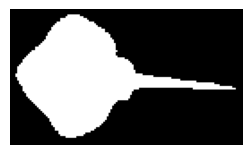

In [168]:
dataset_images = [ cv2.bitwise_not(cv2.imread('KIMIA dataset/' + filename, cv2.IMREAD_GRAYSCALE)) for filename in os.listdir('KIMIA dataset/') if filename.endswith('.png') ]

input_image_path = 'KIMIA dataset/kk0729.png'
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
input_image = cv2.bitwise_not(input_image)
input_image_contours, hierarchy = cv2.findContours(input_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(f"Input Image: {input_image_path}")
plt.figure(figsize=(3, 3))
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.show()

### The algorithm used for this task does not require any training

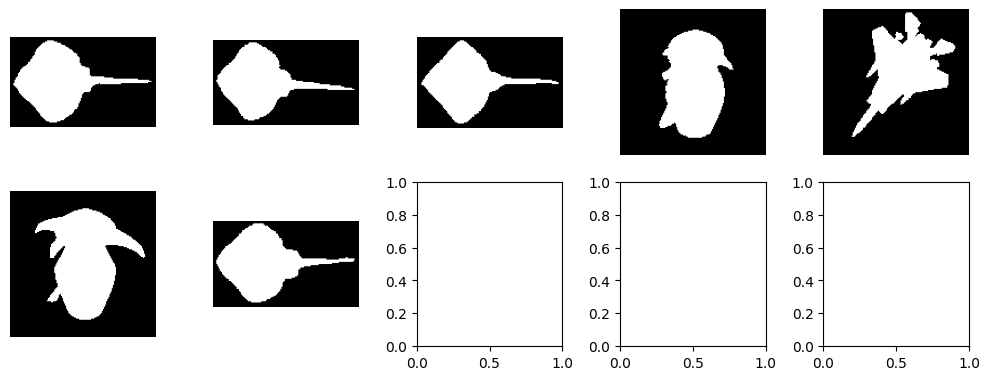

In [169]:
cnt1 = input_image_contours[0]

matched_images = []

for comparison_image in dataset_images:
    best_match_score = 1
    best_match_image = comparison_image

    comparison_image_contours, _ = cv2.findContours(comparison_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt2 = comparison_image_contours[0]

    match_score = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
    if match_score < best_match_score:
        best_match_score = match_score
        best_match_image = comparison_image

    if best_match_score < 0.20:
        # print('Match found with score: ' + str(best_match_score))
        matched_images.append(best_match_image)

# Step 2: Once you know how many matches you have, create the plot grid
num_matches = len(matched_images)
num_rows = (num_matches - 1) // 5 + 1

fig, axs = plt.subplots(num_rows, 5, figsize=(10, 2 * num_rows))
if num_matches > 1:
    axs = axs.ravel()
elif num_matches == 0:
    print("No matches found!")
    exit()

# Step 3: Display the matches in the grid
for idx, image in enumerate(matched_images):
    axs[idx].imshow(image, cmap='gray')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


### Match 2 images

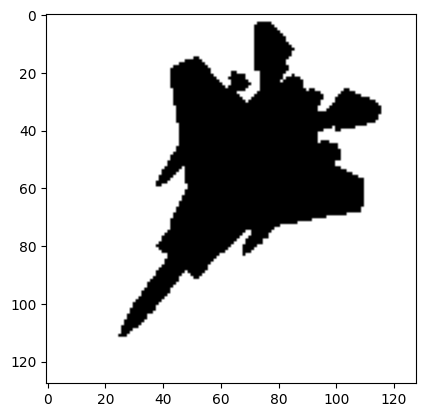

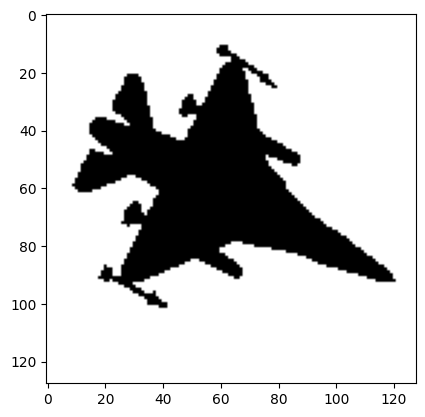

Match score: 0.12666705792487826


In [155]:
# take 2 input file paths and print the match score

image_1_path = 'KIMIA dataset/f15.png'
image_2_path = 'KIMIA dataset/f16.png'

image_1 = cv2.imread(image_1_path, cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread(image_2_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image_1, cmap='gray')
plt.show()
plt.imshow(image_2, cmap='gray')
plt.show()

image_1 = cv2.bitwise_not(image_1)
image_2 = cv2.bitwise_not(image_2)

image_1_contours, hierarchy = cv2.findContours(image_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_2_contours, hierarchy = cv2.findContours(image_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt1 = image_1_contours[0]
cnt2 = image_2_contours[0]

match_score = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
print('Match score: ' + str(match_score))